In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
import sys
import os

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, GRU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import TimeDistributed,Bidirectional,GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

In [22]:
import tensorflow as tf

import numpy as np
import os
from tensorflow import keras
#import keras
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [23]:
data_path = "/home/muhlabws4/Masaüstü/tkd_data/orj"

In [24]:
class_folders = os.listdir(data_path)

In [41]:
images = []
labels = []

In [42]:
for i , class_name in enumerate(class_folders):
    class_folder_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_folder_path)
    
    for img_name in class_images:
        img_path = os.path.join(class_folder_path, img_name)
        img = load_img(img_path, target_size=(180,320))
        img_array = img_to_array(img) /255.0
        images.append(img_array)
        labels.append(class_name)

In [43]:
X = np.array(images)
y = np.array(labels)

In [44]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

In [45]:
X_shuf, y_shuf = X, y_encoder

In [46]:
train_images, test_images, train_labels, test_labels = train_test_split(X_shuf, y_shuf, test_size=0.2, random_state=42)

In [47]:
print(X.shape)
print(y.shape)
print(y_encoder.shape)

(407, 180, 320, 3)
(407,)
(407,)


In [48]:
#class_names = ['head_sb','head_sesor', 'other','punch','rotation']
class_names = ['head', 'other','punch']

In [49]:
img_height=180
img_width=320
output=3

In [50]:
checkpoint_path = "best_modelI3.hdf5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [51]:
def pretrained_InceptionV3():
    base_model = InceptionV3(weights="imagenet", include_top=False, input_shape = (img_height,img_width,3))
    base_model.trainable = True ## Not trainable weights
    flatten_layer = Flatten()
    dense_layer_1 = Dense(256, activation='relu')
    #dense_layer_2 = Dense(20, activation='relu')
    prediction_layer = Dense(output, activation='softmax')
    
    model = Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      #dense_layer_2,
      prediction_layer
      ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    return model

In [52]:
def cross_validation(model, X, y, n_splits=5, epochs=5, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #result = []
    for train_inx, val_inx in kfold.split(X):
        X_train, X_val = X[train_inx], X[val_inx]
        y_train, y_val = y[train_inx], y[val_inx]
        
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        a = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, class_weight={0:7,1:10,2:22},callbacks=[checkpoint])
        #model.fit(X_train, y_train, epochs=epochs)
        #result.append(a.history['val_accuracy'])
        
    #return result

In [53]:
def gosterTrain(index):
    plt.figure(figsize=(15,2))
    plt.imshow(train_images[index])
    plt.title(class_names[train_labels[index]])

In [54]:
def gosterTest(index):
    plt.figure(figsize=(15,2))
    plt.imshow(test_images[index])
    plt.title(class_names[test_labels[index]])

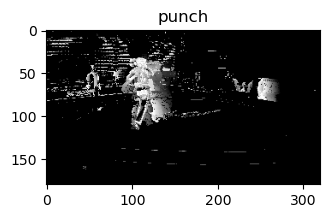

In [55]:
gosterTrain(10)

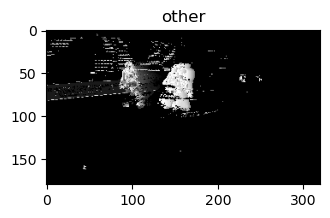

In [56]:
gosterTest(7)

In [59]:
modelIV3 = pretrained_InceptionV3()
result = cross_validation(modelIV3, train_images, train_labels, n_splits=2, epochs=15, batch_size=32)

Epoch 1/15
6/6 - 12s - loss: 355.8607 - accuracy: 0.3827 - 12s/epoch - 2s/step
Epoch 2/15
6/6 - 4s - loss: 149.1945 - accuracy: 0.5926 - 4s/epoch - 731ms/step
Epoch 3/15
6/6 - 5s - loss: 26.4092 - accuracy: 0.6914 - 5s/epoch - 751ms/step
Epoch 4/15
6/6 - 4s - loss: 63.5734 - accuracy: 0.6543 - 4s/epoch - 733ms/step
Epoch 5/15
6/6 - 4s - loss: 18.2756 - accuracy: 0.5864 - 4s/epoch - 735ms/step
Epoch 6/15
6/6 - 4s - loss: 17.4514 - accuracy: 0.5802 - 4s/epoch - 728ms/step
Epoch 7/15
6/6 - 4s - loss: 12.1339 - accuracy: 0.5556 - 4s/epoch - 729ms/step
Epoch 8/15
6/6 - 4s - loss: 10.2197 - accuracy: 0.5679 - 4s/epoch - 744ms/step
Epoch 9/15
6/6 - 4s - loss: 10.3525 - accuracy: 0.5556 - 4s/epoch - 738ms/step
Epoch 10/15
6/6 - 4s - loss: 9.5899 - accuracy: 0.5556 - 4s/epoch - 739ms/step
Epoch 11/15
6/6 - 4s - loss: 9.1153 - accuracy: 0.5617 - 4s/epoch - 749ms/step
Epoch 12/15
6/6 - 5s - loss: 9.4542 - accuracy: 0.5617 - 5s/epoch - 780ms/step
Epoch 13/15
6/6 - 5s - loss: 11.1304 - accuracy: 0.

In [61]:
modelIV3.evaluate(test_images, test_labels)

3/3 [==============================] - 1s 165ms/step - loss: 1.2142 - accuracy: 0.4756


[1.2142287492752075, 0.47560974955558777]

In [63]:
tahminlerIV3 = modelIV3.predict(test_images)

3/3 [==============================] - 2s 166ms/step


In [79]:
modelIV3.save(checkpoint_path)

/home/muhlabws4/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
y_pred_classes = np.argmax(tahminlerIV3,axis=1)

In [65]:
tahminlerIV3[:7]

array([[0.32460815, 0.33007044, 0.3453214 ],
       [0.32460815, 0.33007044, 0.3453214 ],
       [0.32460815, 0.33007044, 0.3453214 ],
       [0.32460815, 0.33007044, 0.3453214 ],
       [0.32460815, 0.33007044, 0.3453214 ],
       [0.5459261 , 0.0826096 , 0.37146437],
       [0.32460815, 0.33007044, 0.3453214 ]], dtype=float32)

In [66]:
np.argmax(tahminlerIV3[9])

2

In [67]:
test_labels

array([0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1])

In [68]:
y_pred_classes

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0])

In [69]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.13      0.11      0.12        19
           1       0.00      0.00      0.00        20
           2       0.55      0.86      0.67        43

    accuracy                           0.48        82
   macro avg       0.23      0.32      0.26        82
weighted avg       0.32      0.48      0.38        82



/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

In [73]:
print(conf_matrix)

[[ 2  0 17]
 [ 7  0 13]
 [ 6  0 37]]


In [75]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

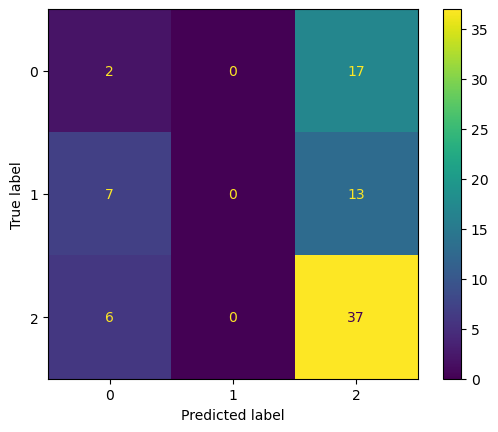

In [76]:
cm_display.plot()
plt.show() 